<a href="https://colab.research.google.com/github/splopsky/K_Contemp_Poem_Generator/blob/main/k_contemp_poem_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [787 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelea

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
tokenizer = Tokenizer()

data = open('./drive/MyDrive/text/k_poem.txt').read()

corpus = data.split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'나는': 1, '내': 2, '이': 3, '또': 4, '그': 5, '그리고': 6, '것은': 7, '어느': 8, '내가': 9, '한': 10, '나를': 11, '것이다': 12, '가난한': 13, '이렇게': 14, '흰': 15, '같이': 16, '하고': 17, '가는': 18, '슬픈': 19, '아름다운': 20, '나의': 21, '별': 22, '것만': 23, '하는': 24, '것을': 25, '같은': 26, '것이': 27, '이것은': 28, '푹푹': 29, '오는': 30, '사나이가': 31, '하나에': 32, '당신이': 33, '생각한다': 34, '있는': 35, '하며': 36, '먼': 37, '산': 38, '가자': 39, '우는': 40, '속에': 41, '좋아하는': 42, '가고': 43, '무엇인가': 44, '바람이': 45, '같구려': 46, '어쩐지': 47, '것과': 48, '없는': 49, '탓이고': 50, '언제나': 51, '사랑하는': 52, '집': 53, '멀리': 54, '쓸쓸한': 55, '많은': 56, '위에': 57, '없이': 58, '눈을': 59, '높은': 60, '이런': 61, '다': 62, '그림자를': 63, '있다': 64, '사람이': 65, '하늘이': 66, '길': 67, '긴': 68, '아들': 69, '속을': 70, '지나서': 71, '달이': 72, '흐르고': 73, '있읍니다': 74, '파란': 75, '말을': 76, '쓰자': 77, '오늘도': 78, '이름과': 79, '사랑처럼': 80, '아우의': 81, '아니': 82, '생각하는': 83, '많이': 84, '오래': 85, '시집을': 86, '생각이': 87, '외면하고': 88, '걸어가는': 89, '젊은': 90, '불고': 91, '오면': 92, '손을': 93, '것이었다': 94, '적이며': 95, '그러나': 96, '고개를': 97, 

In [4]:
input_sequences = []
#n-gram 단위로 학습 할 예정.
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
# 가장 긴 줄에 따라 나머지 줄들도 맞춰서 길이를 패딩함
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
# 예측에 사용되는 시퀀스와 라벨을 설정. 맨 마지막 단어.
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index)

{'나는': 1, '내': 2, '이': 3, '또': 4, '그': 5, '그리고': 6, '것은': 7, '어느': 8, '내가': 9, '한': 10, '나를': 11, '것이다': 12, '가난한': 13, '이렇게': 14, '흰': 15, '같이': 16, '하고': 17, '가는': 18, '슬픈': 19, '아름다운': 20, '나의': 21, '별': 22, '것만': 23, '하는': 24, '것을': 25, '같은': 26, '것이': 27, '이것은': 28, '푹푹': 29, '오는': 30, '사나이가': 31, '하나에': 32, '당신이': 33, '생각한다': 34, '있는': 35, '하며': 36, '먼': 37, '산': 38, '가자': 39, '우는': 40, '속에': 41, '좋아하는': 42, '가고': 43, '무엇인가': 44, '바람이': 45, '같구려': 46, '어쩐지': 47, '것과': 48, '없는': 49, '탓이고': 50, '언제나': 51, '사랑하는': 52, '집': 53, '멀리': 54, '쓸쓸한': 55, '많은': 56, '위에': 57, '없이': 58, '눈을': 59, '높은': 60, '이런': 61, '다': 62, '그림자를': 63, '있다': 64, '사람이': 65, '하늘이': 66, '길': 67, '긴': 68, '아들': 69, '속을': 70, '지나서': 71, '달이': 72, '흐르고': 73, '있읍니다': 74, '파란': 75, '말을': 76, '쓰자': 77, '오늘도': 78, '이름과': 79, '사랑처럼': 80, '아우의': 81, '아니': 82, '생각하는': 83, '많이': 84, '오래': 85, '시집을': 86, '생각이': 87, '외면하고': 88, '걸어가는': 89, '젊은': 90, '불고': 91, '오면': 92, '손을': 93, '것이었다': 94, '적이며': 95, '그러나': 96, '고개를': 97, 

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
# 150개의 unit을 갖고 있는 LSTM layer를 추가
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)
print (model.summary())
print(model)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


60/60 [==============================] - 9s 91ms/step - loss: 7.4327 - accuracy: 0.0010
Epoch 2/100
60/60 [==============================] - 5s 89ms/step - loss: 7.1700 - accuracy: 0.0146
Epoch 3/100
60/60 [==============================] - 5s 91ms/step - loss: 6.1879 - accuracy: 0.0402
Epoch 4/100
60/60 [==============================] - 5s 88ms/step - loss: 4.5196 - accuracy: 0.1373
Epoch 5/100
60/60 [==============================] - 5s 89ms/step - loss: 2.6301 - accuracy: 0.4068
Epoch 6/100
60/60 [==============================] - 5s 88ms/step - loss: 1.3535 - accuracy: 0.6799
Epoch 7/100
60/60 [==============================] - 5s 90ms/step - loss: 0.6668 - accuracy: 0.8538
Epoch 8/100
60/60 [==============================] - 5s 91ms/step - loss: 0.4097 - accuracy: 0.9097
Epoch 9/100
60/60 [==============================] - 5s 90ms/step - loss: 0.3255 - accuracy: 0.9217
Epoch 10/100
60/60 [==============================] - 5s 89ms/step - loss: 0.2829 - accuracy: 0.9232
Epoch 11/10

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

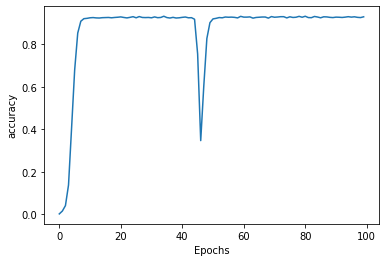

In [8]:
plot_graphs(history, 'accuracy')

In [9]:
seed_text = "날이 밝습니다"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0).argmax(axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word


print(seed_text)

날이 밝습니다 있었다 짖는다 밤에 살자 출출이 오면 작은 앞에 아배 앞에는 왕사발에 아들 앞에는 새끼사발에 그득히 사리워오는 것이다 목수네 가까이 싶다고 생각 거외다 언제나 한 방에 들어서 쥔을 붙이없다 뒤뜰에 누워 본다 주저앉어서 나는 가난한 아버지를 가진 것과 것은 무엇인가 흰 홍동이 옷의 슬픔이며 하며 이는 당나귀 타고 것같이 이 이


In [21]:
import konlpy
from konlpy.tag import Mecab

tokenizer2 = Mecab()
line = []
nouns = []

line = tokenizer2.pos(seed_text)

for word, tag in line:
    if tag in ['NNG']:
        nouns.append(word)
print(nouns)

['날', '밤', '앞', '아배', '앞', '왕', '사발', '아들', '앞', '새끼', '사발', '사리', '워', '목수', '생각', '쥔', '붙이', '뒤', '뜰', '가난', '아버지', '홍동', '옷', '슬픔', '당나귀']


In [22]:
import textwrap
import random

title = random.choice(nouns)
result = textwrap.wrap(seed_text, width=30)

print(title)
print('\n')
print('\n'.join(result))

슬픔


날이 밝습니다 있었다 짖는다 밤에 살자 출출이 오면
작은 앞에 아배 앞에는 왕사발에 아들 앞에는 새끼사발에
그득히 사리워오는 것이다 목수네 가까이 싶다고 생각
거외다 언제나 한 방에 들어서 쥔을 붙이없다 뒤뜰에
누워 본다 주저앉어서 나는 가난한 아버지를 가진 것과
것은 무엇인가 흰 홍동이 옷의 슬픔이며 하며 이는
당나귀 타고 것같이 이 이


In [24]:
seed_text2 = "배가 고픈 밤"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text2])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0).argmax(axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text2 += " " + output_word


line2 = []
nouns2 = []

line = tokenizer2.pos(seed_text2)

for word, tag in line:
    if tag in ['NNG']:
        nouns2.append(word)

title2 = random.choice(nouns2)
result2 = textwrap.wrap(seed_text2, width=30)

print(title2)
print('\n')
print('\n'.join(result2))

홍동


배가 고픈 밤 이 사람들과 친하니 싸다니고 싶은 밤이다
잠이 연달아 귀해하고 점 많이 나서 흥성흥성 할 것이다
것이다 마을 가까이 사는 토산 고무 고무의 딸 승녀
아들 승동이 작은 이녀 작은 홍동이 작은 작은 작은
홍동이 작은 작은 홍동이 작은 작은 홍동이 작은 작은
작은 홍동이 작은 작은 홍동이 작은 작은 홍동이
